<a href="https://colab.research.google.com/github/Foster1466/Tensorflow-in-practice/blob/master/course_2_week_1_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-09-18 07:15:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   137MB/s    in 0.5s    

2020-09-18 07:15:20 (137 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [18]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames)
print(train_dogs_fnames)

['cat.54.jpg', 'cat.964.jpg', 'cat.478.jpg', 'cat.596.jpg', 'cat.526.jpg', 'cat.351.jpg', 'cat.263.jpg', 'cat.896.jpg', 'cat.378.jpg', 'cat.246.jpg', 'cat.208.jpg', 'cat.438.jpg', 'cat.756.jpg', 'cat.253.jpg', 'cat.808.jpg', 'cat.863.jpg', 'cat.874.jpg', 'cat.829.jpg', 'cat.432.jpg', 'cat.730.jpg', 'cat.380.jpg', 'cat.84.jpg', 'cat.728.jpg', 'cat.365.jpg', 'cat.963.jpg', 'cat.300.jpg', 'cat.431.jpg', 'cat.619.jpg', 'cat.877.jpg', 'cat.493.jpg', 'cat.747.jpg', 'cat.277.jpg', 'cat.515.jpg', 'cat.255.jpg', 'cat.268.jpg', 'cat.169.jpg', 'cat.836.jpg', 'cat.423.jpg', 'cat.427.jpg', 'cat.736.jpg', 'cat.902.jpg', 'cat.929.jpg', 'cat.623.jpg', 'cat.266.jpg', 'cat.901.jpg', 'cat.946.jpg', 'cat.797.jpg', 'cat.893.jpg', 'cat.289.jpg', 'cat.718.jpg', 'cat.106.jpg', 'cat.592.jpg', 'cat.925.jpg', 'cat.824.jpg', 'cat.841.jpg', 'cat.292.jpg', 'cat.651.jpg', 'cat.709.jpg', 'cat.141.jpg', 'cat.872.jpg', 'cat.995.jpg', 'cat.242.jpg', 'cat.729.jpg', 'cat.601.jpg', 'cat.751.jpg', 'cat.430.jpg', 'cat.910.jp

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape= (150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr= 0.01), loss= 'binary_crossentropy', metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1.0 / 255. )
validation_datagen = ImageDataGenerator(rescale= 1.0 / 255. )

train_generator = train_datagen.flow_from_directory( train_dir, target_size= (150,150), batch_size= 20, class_mode= 'binary')
validation_generator = validation_datagen.flow_from_directory( validation_dir, target_size = (150,150), batch_size= 20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=100, validation_data= validation_generator, validation_steps= 50,verbose=2)

Epoch 1/15
100/100 - 10s - loss: 8.9827 - accuracy: 0.5290 - val_loss: 0.6923 - val_accuracy: 0.5010
Epoch 2/15
100/100 - 10s - loss: 0.7029 - accuracy: 0.4935 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/15
100/100 - 10s - loss: 0.7840 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/15
100/100 - 10s - loss: 0.9446 - accuracy: 0.5065 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 5/15
100/100 - 10s - loss: 0.6940 - accuracy: 0.4935 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/15
100/100 - 10s - loss: 0.6938 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/15
100/100 - 10s - loss: 0.6959 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/15
100/100 - 10s - loss: 0.6987 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 9/15
100/100 - 10s - loss: 0.6936 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/15
100/100 - 10s - loss: 0.6937 - accuracy: 0.4860 - val_loss: 0.6932 - val_accura

In [16]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

MessageError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


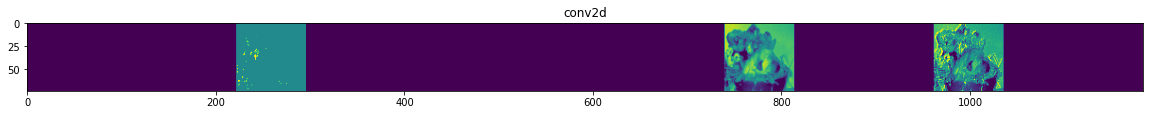

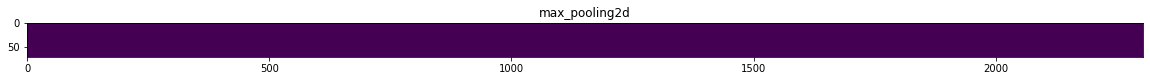

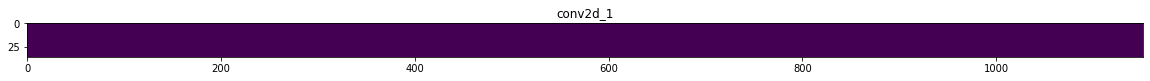

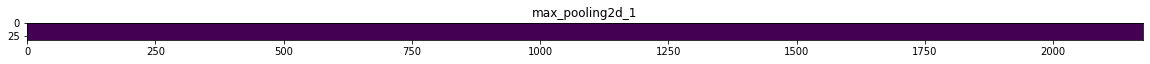

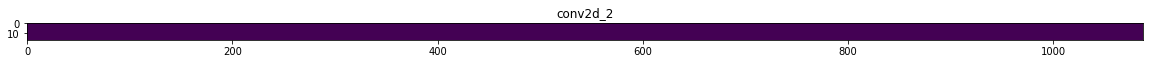

In [22]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt


# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 